# Perceptron de uma camada - Modelo simples
Fonte:_(Coletanea Python do zero as redes neurais - Fernando Feltrin)_

O modelo mais básico usado na literatura para fins didáticos é o modelo onde 'e dada a representação de 3 espaços alocados para entradas $(X, Y e Z)$, note que estas 3 figuras se conectam com uma estrutura central com o símbolo Sigma $\Sigma$, normalmente atribuído a uma Função Soma, operação aritmética bastante comum e por fim, esta se comunica com uma última estrutura lógica onde há o símbolo de uma Função de Ativação $f(x)$.

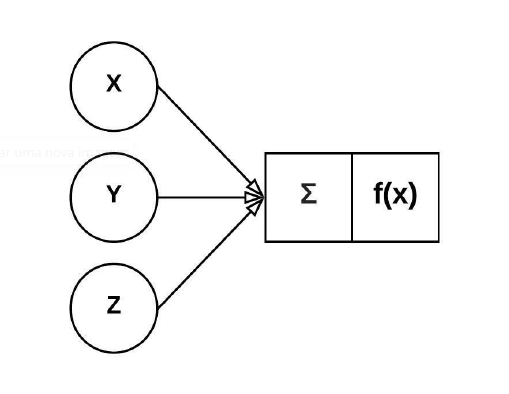

A partir deste modelo pode-se resolver de forma computacional os
chamados problemas linearmente separáveis. De forma bastante geral
pode-se entender tal conceito como o tipo de problema computacional onde
se resulta apenas um valor a ser usado para uma tomada de decisão. A partir desse modelo cria-se uma pequena rede neural que pode processar dados para que se ative ou não um neurônio, podemos abstrair essa condição também como se faz com operadores lógicos, onde uma tomada de decisão resultava em $0$ ou $1$, `True` ou `False`, `return x` ou `return y`, etc. Tomadas de decisão onde o que importa é uma opção ou outra.

Partindo para prática, agora atribuindo valores e funções para essa
estrutura, pode-se finalmente começar a entender de forma objetiva o
processamento da mesma:

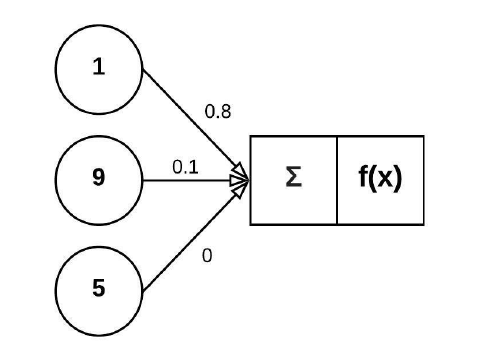



In [1]:
#Atribuiç~ao das entradas e pesos

entradas = [1, 9, 5]
pesos = [0.8, 0.1, 0]


Em seguida teremos de executar uma simples função de soma entre
cada entrada e seu respectivo peso e posteriormente a soma dos valores
obtidos a partir deles.
Neste exemplo essa função se dará da seguinte forma:

Soma = $(1 * 0.8) + (9 * 0.1) + (5 * 0)$

Soma = $0.8 + 0.9 + 0$

Soma = $1.7$

In [4]:
#implementaç~ao funç~ao de soma

def soma(e, p): #recebe entradas e pesos

  s = 0 #inicia a vari'avel s

  for i in range(3): #for do tamanho dos vetores de pesos e entradas

    s += e[i]*p[i] #multiplicar cada entrada por seu peso e somar

  return s

s = soma(entradas, pesos)

s

1.7000000000000002

Por fim a função de ativação neste caso, chamada de *Step Function*
(em tradução livre *Função Degrau*) possui uma regra bastante simples, se o
valor resultado da função de soma for $1$ ou maior que $1$, o neurônio será
ativado, se for uma valor abaixo de $1$ (mesmo aproximado, mas menor que $1$)
este neurônio em questão não será ativado.

Soma $\geq$ 1 (Ativação)

Soma < 1 (Não Ativação)

In [5]:
#definiç~ao da funçao de ativaç~ao

def heaviside(s): #recebe o valor da soma

  if s >= 1: #verifica se 'e maior que 1

    return 1

  return 0

heaviside(s)

1